In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\Downloads\\random_forest_classifier_dataset - random_forest_classifier_dataset.csv")
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,target
0,-6.030225,-4.518039,-1.749673,2.043216,0.093535,-0.794560,-7.430221,-5.459525,-0.294393,6.270225,...,0.687773,-0.163811,-7.468058,-1.264345,0.957074,0.691018,1.305405,1.860911,6.996846,2
1,1.212090,1.237390,-1.821298,-1.998022,0.643511,0.472501,-0.997897,2.100388,-0.588881,-0.252118,...,-1.430437,-1.997070,-2.162516,0.057466,2.219890,2.640864,-1.861576,0.466973,4.007771,0
2,-2.961170,-3.439399,1.495563,0.932098,-1.731450,0.483315,2.322005,-5.875290,-2.973189,-0.429869,...,-1.450299,-1.694877,-0.217263,-2.809817,1.665062,1.860662,-1.166784,1.313421,3.063331,0
3,3.873936,1.061461,5.247461,-3.344804,-1.743875,-0.238930,-0.014707,5.490836,-7.212629,-2.391462,...,-1.943054,0.872526,1.401222,-2.731850,0.462559,-4.723582,0.790762,0.232200,3.289822,0
4,-0.774172,4.498125,3.102363,-2.807180,-7.366322,-1.383047,2.487188,5.048393,-11.541242,-0.067506,...,0.928591,-1.491309,0.311195,0.703603,-0.326624,-0.209455,0.202609,-1.926512,-1.501279,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   2300 non-null   float64
 1   feature_2   2300 non-null   float64
 2   feature_3   2300 non-null   float64
 3   feature_4   2300 non-null   float64
 4   feature_5   2300 non-null   float64
 5   feature_6   2300 non-null   float64
 6   feature_7   2300 non-null   float64
 7   feature_8   2300 non-null   float64
 8   feature_9   2300 non-null   float64
 9   feature_10  2300 non-null   float64
 10  feature_11  2300 non-null   float64
 11  feature_12  2300 non-null   float64
 12  feature_13  2300 non-null   float64
 13  feature_14  2300 non-null   float64
 14  feature_15  2300 non-null   float64
 15  feature_16  2300 non-null   float64
 16  feature_17  2300 non-null   float64
 17  feature_18  2300 non-null   float64
 18  feature_19  2300 non-null   float64
 19  feature_20  2300 non-null  

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.duplicated().sum()

0

In [6]:
# df.corr()

In [7]:
df["target"]

0       2
1       0
2       0
3       0
4       2
       ..
2295    2
2296    2
2297    0
2298    1
2299    0
Name: target, Length: 2300, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"],axis="columns"),df["target"],test_size = 0.2)

In [9]:
print(len(x_train))
print(len(x_test))

1840
460


In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000) # No. of decsion tree
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [11]:
model.score(x_test,y_test)*100

85.43478260869564

In [12]:
y_predi = model.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix
com = confusion_matrix(y_test,y_predi)
com

array([[127,  13,  17],
       [  3, 147,   6],
       [ 15,  13, 119]], dtype=int64)

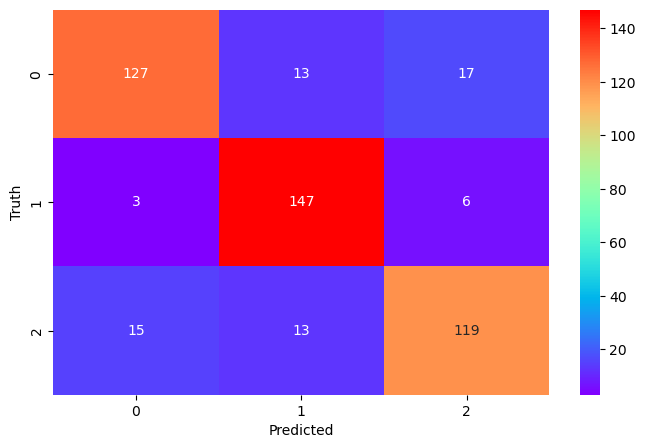

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(com, annot=True, fmt=".0f", cmap="rainbow", cbar_kws={'format': '%.0f'})
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
